In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_train = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv")

df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [46]:
print(df_train.describe())
print()
print(df_train.dtypes)
print()
# For string columns,whether they have NaN or not 
l =  df_train.columns[df_train.isnull().any()].tolist()
print("Nan Columns " + str(l))

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  

Item_Identifier               object
Item_We

In [47]:
# Frequency Distribution for categorical variables 
categorical_columns = [x for x in df_train.dtypes.index if df_train.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier']]

for col in categorical_columns:
    print("Frequency of Categories for varible " + str(col))
    print(df_train[col].value_counts())
    print()

Frequency of Categories for varible Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Fr

In [48]:
print(df_test.describe())
print()
print(df_test.dtypes)
print()
# For string columns,whether they have NaN or not 
l =  df_test.columns[df_test.isnull().any()].tolist()
print("Nan Columns " + str(l))
# df_test

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size        

In [49]:
df_train.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [50]:
# # Item_Visibility has 0 min value, wrong!! impute 
# earlier_count = 0
# later_count = 0
# for value in df_train['Item_Visibility']:
#     if value == 0:
#         earlier_count+=1;
        
# print(count)

# def fill(x):
#     if x==0:
#         return df_train_new['Item_Visibility'].mean()
    
# df_train['Item_Visibility'] = df_train['Item_Visibility'].apply(fill)
# df_test['Item_Visibility'] = df_test['Item_Visibility'].apply(fill)

# for value in df_train['Item_Visibility']:
#     if value == 0:
#         later_count+=1;
        
# print(later_count)
# # print(df_train)

visibility_avg = df_train.pivot_table(values='Item_Visibility', index='Item_Identifier')
# print(visibility_avg)
#Impute 0 values with mean visibility of that product:
miss_bool = (df_train['Item_Visibility'] == 0)
print(sum(miss_bool))

df_train.loc[miss_bool,'Item_Visibility'] = df_train.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg[x])
miss_bool = (df_train['Item_Visibility'] == 0)
print(sum(miss_bool))

526
0


In [51]:
visibility_avg_test = df_test.pivot_table(values='Item_Visibility', index='Item_Identifier')
# print(visibility_avg)
#Impute 0 values with mean visibility of that product:
miss_bool_test = (df_test['Item_Visibility'] == 0)
print(sum(miss_bool_test))

df_test.loc[miss_bool_test,'Item_Visibility'] = df_test.loc[miss_bool_test,'Item_Identifier'].apply(lambda x: visibility_avg_test[x])
miss_bool_test = (df_test['Item_Visibility'] == 0)
print(sum(miss_bool_test))

353
13


In [52]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.068711,141.023273,1997.828903
std,4.664849,0.049557,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.030436,94.412000,1987.000000
50%,12.500000,0.056474,141.415400,1999.000000
75%,16.700000,0.094690,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [53]:
print(df_train['Item_Fat_Content'].unique())

df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace(['low fat','Low Fat'], 'LF')
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace(['Regular'], 'reg')

# def convert_fat(x):
#     if x == 'LF':
#         return 1
#     else:
#         return 0
    
# print(df_train['Item_Fat_Content'].unique())
# df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].apply(convert_fat)

# print(df_train.dtypes)

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [54]:
print(df_test['Item_Fat_Content'].unique())

df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace(['low fat','Low Fat'], 'LF')
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace(['Regular'], 'reg')

# def convert_fat(x):
#     if x == 'LF':
#         return 1
#     else:
#         return 0
    
# print(df_test['Item_Fat_Content'].unique())
# df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].apply(convert_fat)

# print(df_test.dtypes)

['Low Fat' 'reg' 'Regular' 'LF' 'low fat']


In [55]:
df_train['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDQ40     9
FDF52     9
FDX31     9
NCB18     9
FDX04     9
NCY18     9
NCQ06     9
DRE49     9
FDU12     9
DRN47     9
FDX20     9
FDV38     9
FDP25     9
NCL31     9
FDG09     9
FDO19     9
NCJ30     9
NCI54     9
FDW49     9
FDW26     9
FDV60     9
FDD38     9
NCF42     9
FDT07     9
FDF56     9
FDW48     8
FDX50     8
FDG57     8
         ..
NCS41     2
NCC55     2
FDP15     2
FDE39     2
DRE01     2
DRG25     2
FDE38     2
NCG19     2
NCV18     2
FDM38     2
FDH22     2
FDA48     2
FDU09     2
NCW05     2
FDW58     2
FDW10     2
FDB47     2
FDG28     2
FDT33     2
NCM42     2
FDR03     2
FDQ60     1
DRF48     1
FDO33     1
FDY43     1
FDC23     1
FDE52     1
FDN52     1
FDT35     1
FDK57     1
Name: Item_Identifier, dtype: int64

In [56]:
# for val in df_train['Item_Identifier']:
#     print(val[0:2])

def combined(x):
    return x[0:2]

df_train['Item_Type_Combined'] = df_train['Item_Identifier'].apply(combined)

df_train['Item_Type_Combined'] = df_train['Item_Type_Combined'].map({'FD':'Food',
                                                                     'NC':'Non-Consumable',
                                                                     'DR':'Drinks'})

df_train['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [57]:
# for val in df_train['Item_Identifier']:
#     print(val[0:2])

def combined(x):
    return x[0:2]

df_test['Item_Type_Combined'] = df_test['Item_Identifier'].apply(combined)

df_test['Item_Type_Combined'] = df_test['Item_Type_Combined'].map({'FD':'Food',
                                                                     'NC':'Non-Consumable',
                                                                     'DR':'Drinks'})

df_test['Item_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

In [58]:
df_train['Outlet_Years'] = 2013 - df_train['Outlet_Establishment_Year']
df_train['Outlet_Years'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

In [59]:
df_test['Outlet_Years'] = 2013 - df_test['Outlet_Establishment_Year']
df_test['Outlet_Years'].describe()

count    5681.000000
mean       15.171097
std         8.372256
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

In [60]:
df_train.loc[df_train['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df_train['Item_Fat_Content'].value_counts()

LF            3918
reg           3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [61]:
df_test.loc[df_test['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df_test['Item_Fat_Content'].value_counts()

LF            2581
reg           2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [62]:
#New variable for outlet
df_train['Outlet'] = le.fit_transform(df_train['Outlet_Identifier'])
# df_train

In [63]:
#New variable for outlet
df_test['Outlet'] = le.fit_transform(df_test['Outlet_Identifier'])
# df_train

In [64]:
df_train['Outlet_Size'].unique()

def convert_Outlet_Size(x):
    if x == 'Small':
        return 1
    elif x == 'Medium':
        return 2
    elif x == 'High':
        return 3

df_train['Outlet_Size'] = df_train['Outlet_Size'].apply(convert_Outlet_Size)
# print(df_train.dtypes)

In [65]:
df_test['Outlet_Size'].unique()

def convert_Outlet_Size(x):
    if x == 'Small':
        return 1
    elif x == 'Medium':
        return 2
    elif x == 'High':
        return 3

df_test['Outlet_Size'] = df_test['Outlet_Size'].apply(convert_Outlet_Size)
# print(df_test.dtypes)

In [66]:
df_train['Outlet_Location_Type'].unique()

def convert_Outlet_Location_Type(x):
    if x == 'Tier 1':
        return 1
    elif x == 'Tier 2':
        return 2
    elif x == 'Tier 3':
        return 3

df_train['Outlet_Location_Type'] = df_train['Outlet_Location_Type'].apply(convert_Outlet_Location_Type)
# print(df_train.dtypes)

In [67]:
df_test['Outlet_Location_Type'].unique()

def convert_Outlet_Location_Type(x):
    if x == 'Tier 1':
        return 1
    elif x == 'Tier 2':
        return 2
    elif x == 'Tier 3':
        return 3

df_test['Outlet_Location_Type'] = df_test['Outlet_Location_Type'].apply(convert_Outlet_Location_Type)
# print(df_test.dtypes)

In [68]:
df_train['Outlet_Type'].unique()

def convert_Outlet_Type(x):
    if x == 'Supermarket Type1':
        return 1
    elif x == 'Supermarket Type2':
        return 2
    elif x == 'Supermarket Type3':
        return 3
    elif x == 'Grocery Store':
        return 4
    

df_train['Outlet_Type'] = df_train['Outlet_Type'].apply(convert_Outlet_Type)
# print(df_train.dtypes)

In [69]:
df_test['Outlet_Type'].unique()

def convert_Outlet_Type(x):
    if x == 'Supermarket Type1':
        return 1
    elif x == 'Supermarket Type2':
        return 2
    elif x == 'Supermarket Type3':
        return 3
    elif x == 'Grocery Store':
        return 4
    

df_test['Outlet_Type'] = df_test['Outlet_Type'].apply(convert_Outlet_Type)
# print(df_test.dtypes)

In [70]:
df_train['Item_Type_New'] = le.fit_transform(df_train['Item_Type'])
# print(df_train.dtypes)
# df_train
df_test['Item_Type_New'] = le.fit_transform(df_test['Item_Type'])

In [71]:
df_train['Item_Fat_Content'] = le.fit_transform(df_train['Item_Fat_Content'])
# print(df_train.dtypes)
# df_train
df_test['Item_Fat_Content'] = le.fit_transform(df_test['Item_Fat_Content'])

In [72]:
df_train['Item_Type_Combined'] = le.fit_transform(df_train['Item_Type_Combined'])
# print(df_train.dtypes)
# df_train
df_test['Item_Type_Combined'] = le.fit_transform(df_test['Item_Type_Combined'])

In [73]:
# Filling NaN values , imputing using mean, mode TRAIN
 
df_train['Item_Weight'] = df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())

df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])

l =  df_train.columns[df_train.isnull().any()].tolist()
l

[]

In [74]:
# Filling NaN values, imputing using mean, mode TEST

df_test['Item_Weight'] = df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean())

df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0])

l =  df_test.columns[df_test.isnull().any()].tolist()
l


[]

In [75]:
df_train.dtypes
# Item_Identifier -> Item_Type_Combined
# Outlet_Identifier -> Outlet

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
Item_Type_Combined             int64
Outlet_Years                   int64
Outlet                         int64
Item_Type_New                  int64
dtype: object

In [76]:
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Type_Combined             int64
Outlet_Years                   int64
Outlet                         int64
Item_Type_New                  int64
dtype: object

In [77]:
features = df_train.columns.tolist()

# Identifiers not to be used 
features.remove('Item_Identifier')
features.remove('Outlet_Identifier')
features.remove('Item_Type') # transformed 
features.remove('Item_Outlet_Sales') # To be Predicted 

# Contains all features 
print(features)

['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_Combined', 'Outlet_Years', 'Outlet', 'Item_Type_New']


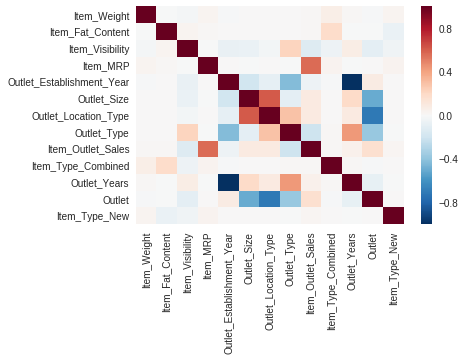

In [125]:
sns.heatmap(df_train.corr())

In [89]:
# # Based on model feature importance of RF and GBR calculated later 
features_gbr = ['Item_MRP', 'Item_Visibility', 'Item_Weight', 
            'Outlet_Type', 'Outlet', 'Outlet_Years',]
print(len(features_gbr))    

6


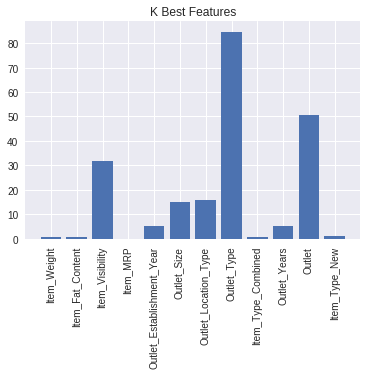

['Item_Visibility',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Type',
 'Outlet_Years',
 'Outlet']

In [88]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

# Perform feature selection
selector = SelectKBest(f_regression, k=7)
selector.fit(df_train[features], df_train['Item_Outlet_Sales'])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores for each feature 
plt.bar(range(len(features)), scores)
plt.xticks(range(len(features)), features, rotation='vertical')
plt.title('K Best Features')
plt.show()

selector.fit(df_train[features], df_train['Item_Outlet_Sales'])
#print b.get_params

# Returns boolean valued array
l = list(selector.get_support())
l

features_new = []

for i in range(len(l)):
    if l[i] == True:
        features_new.append(features[i])
        
# Contains K best selected features
features_new.remove('Outlet_Location_Type')
features_new

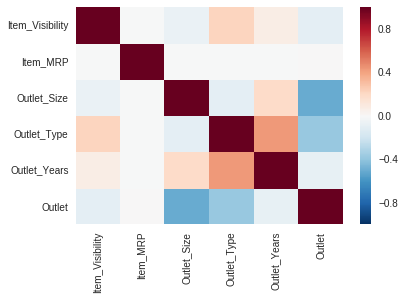

In [112]:
sns.heatmap(df_train[features_new].corr())

In [123]:
# Found out using XGB Feature importance
features_xgb = ['Outlet_Type', 'Item_MRP', 'Outlet_Years', 'Outlet_Size',
                'Item_Visibility', 'Outlet']
features_xgb

['Outlet_Type',
 'Item_MRP',
 'Outlet_Years',
 'Outlet_Size',
 'Item_Visibility',
 'Outlet']

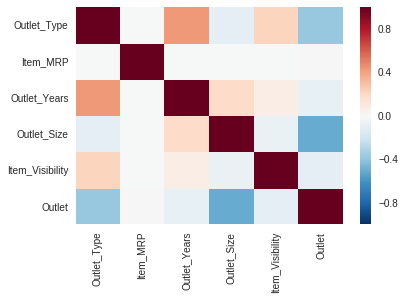

In [124]:
sns.heatmap(df_train[features_xgb].corr())
# features_xgb.remove('Outlet_Size')

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

import xgboost as xgb

# model = RandomForestRegressor(random_state = 1, n_estimators =500 , min_samples_split = 8, min_samples_leaf = 4)

# model = GradientBoostingRegressor(random_state = 1, n_estimators = 100, min_samples_split = 8, min_samples_leaf = 4, learning_rate = 0.1)

model = xgb.XGBRegressor(n_estimators = 80, gamma=0.2, learning_rate=0.1)

model.fit(df_train[features_xgb], df_train['Item_Outlet_Sales'])
predictions = model.predict(df_test[features_xgb])
predictions = predictions.astype(int)

# K Fold cross validation 
kf = KFold(len(df_train), 5, shuffle=True, random_state=8)
errors = cross_val_score(model, df_train[features_xgb], df_train['Item_Outlet_Sales'], scoring='neg_mean_squared_error', cv=kf)

print(np.sqrt(abs(np.mean(errors))))
# print(np.mean(errors))

sub = pd.DataFrame({'Item_Identifier': df_test['Item_Identifier'], 'Outlet_Identifier': df_test['Outlet_Identifier'], 'Item_Outlet_Sales':predictions})
sub.to_csv('./output.csv', index=False)

1080.45288055


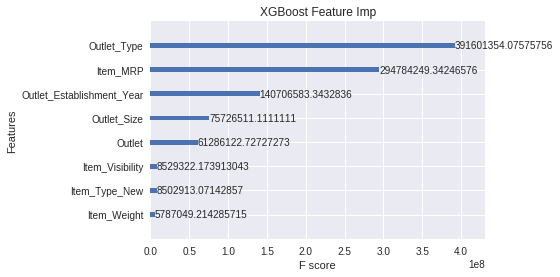

In [82]:
# # Feature importance XGB for all features 
from xgboost import plot_importance
plot_importance(model, importance_type="gain")
pyplot.title("XGBoost Feature Imp")
pyplot.show()

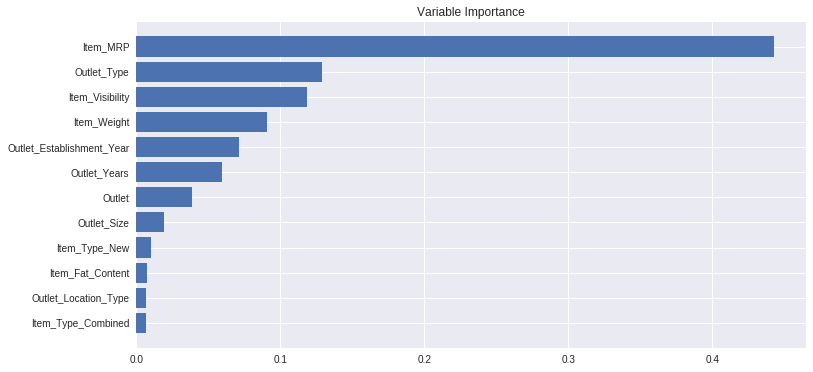

In [87]:
# Feature importance for RF and GBR all features

feature_importance = model.feature_importances_
# # make importances relative to max importance
# # feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 1
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_train[features][sorted_idx])
# plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [84]:
# sns.lmplot(x='Item_MRP', y='Item_Outlet_Sales', data=df_train)